In [36]:
import pandas as pd
import numpy as np

In [37]:
data = pd.read_csv('Train.csv')
submit = pd.read_csv('Test.csv')

In [38]:
data.head()

,ID,Default,Checking_amount,Term,Credit_score,Gender,Marital_status,Car_loan,Personal_loan,Home_loan,Education_loan,Emp_status,Amount,Saving_amount,Emp_duration,Age,No_of_credit_acc
0,101,No,988,15.0,796.0,Female,Single,Yes,No,No,No,employed,1536,3455,12.0,38,1.0
1,102,No,458,15.0,813.0,Female,Single,Yes,No,No,No,employed,947,3600,25.0,36,1.0
2,103,No,158,14.0,756.0,Female,Single,No,Yes,No,No,employed,1678,3093,43.0,34,1.0
3,104,Yes,300,25.0,737.0,Female,Single,No,No,No,Yes,employed,1804,2449,0.0,29,1.0
4,105,Yes,63,24.0,662.0,Female,Single,No,No,No,Yes,unemployed,1184,2867,4.0,30,1.0


In [39]:
data.isnull().sum()

ID                  0
Default             0
Checking_amount     0
Term                1
Credit_score        2
Gender              0
Marital_status      0
Car_loan            1
Personal_loan       2
Home_loan           2
Education_loan      1
Emp_status          0
Amount              0
Saving_amount       0
Emp_duration        3
Age                 0
No_of_credit_acc    1
dtype: int64

In [40]:
data.dtypes

ID                    int64
Default              object
Checking_amount       int64
Term                float64
Credit_score        float64
Gender               object
Marital_status       object
Car_loan             object
Personal_loan        object
Home_loan            object
Education_loan       object
Emp_status           object
Amount                int64
Saving_amount         int64
Emp_duration        float64
Age                   int64
No_of_credit_acc    float64
dtype: object

**Data Merge**

In [41]:
submit['Default'] = None
all_data = data.append(submit, ignore_index = True)
print(len(data), len(submit), len(all_data))

803 203 1006


C:\Users\Bhushan\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


**Preprocessing**

In [42]:
all_data['Default'] = all_data['Default'].apply(lambda x: 0 if x =='No' else x)
all_data['Default'] = all_data['Default'].apply(lambda x: 1 if x =='Yes' else x)

In [43]:
all_data['Term'].fillna(np.mean(all_data.Term), inplace = True)
all_data['Credit_score'].fillna(np.mean(all_data.Credit_score), inplace = True)
all_data['Amount'].fillna(np.mean(all_data.Amount), inplace = True)
all_data['Checking_amount'].fillna(np.mean(all_data.Checking_amount), inplace = True)
all_data['Saving_amount'].fillna(np.mean(all_data.Saving_amount), inplace = True)
all_data['Emp_duration '].fillna(np.mean(all_data['Emp_duration '] ), inplace = True)
all_data['Marital_status '] = all_data['Marital_status '].fillna(all_data['Marital_status '].value_counts().index[0])
all_data['Car_loan'] = all_data['Car_loan'].fillna(all_data['Car_loan'].value_counts().index[0])
all_data['Personal_loan'] = all_data['Personal_loan'].fillna(all_data['Personal_loan'].value_counts().index[0])
all_data['Home_loan'] = all_data['Home_loan'].fillna(all_data['Home_loan'].value_counts().index[0])
all_data['Education_loan'] = all_data['Education_loan'].fillna(all_data['Education_loan'].value_counts().index[0])
all_data['No_of_credit_acc'] = all_data['No_of_credit_acc'].fillna(all_data['No_of_credit_acc'].value_counts().index[0])

In [44]:
all_data.isnull().sum()

Age                   0
Amount                0
Car_loan              0
Checking_amount       0
Credit_score          0
Default             203
Education_loan        0
Emp_duration          0
Emp_status            0
Gender                0
Home_loan             0
ID                    0
Marital_status        0
No_of_credit_acc      0
Personal_loan         0
Saving_amount         0
Term                  0
dtype: int64

In [45]:
all_data.head()

,Age,Amount,Car_loan,Checking_amount,Credit_score,Default,Education_loan,Emp_duration,Emp_status,Gender,Home_loan,ID,Marital_status,No_of_credit_acc,Personal_loan,Saving_amount,Term
0,38,1536.0,Yes,988.0,796.0,0.0,No,12.0,employed,Female,No,101,Single,1.0,No,3455.0,15.0
1,36,947.0,Yes,458.0,813.0,0.0,No,25.0,employed,Female,No,102,Single,1.0,No,3600.0,15.0
2,34,1678.0,No,158.0,756.0,0.0,No,43.0,employed,Female,No,103,Single,1.0,Yes,3093.0,14.0
3,29,1804.0,No,300.0,737.0,1.0,Yes,0.0,employed,Female,No,104,Single,1.0,No,2449.0,25.0
4,30,1184.0,No,63.0,662.0,1.0,Yes,4.0,unemployed,Female,No,105,Single,1.0,No,2867.0,24.0


In [46]:
all_data['Car_loan'] = [0 if x == 'No' else 1 for x in all_data['Car_loan']]
all_data['Education_loan'] = [0 if x == 'No' else 1 for x in all_data['Education_loan']]
all_data['Home_loan'] = [0 if x == 'No' else 1 for x in all_data['Home_loan']]
all_data['Personal_loan'] = [0 if x == 'No' else 1 for x in all_data['Personal_loan']]
all_data['Marital_status '] = [0 if x == 'Single' else 1 for x in all_data['Marital_status ']]
all_data['Emp_status'] = [0 if x == 'unemployed' else 1 for x in all_data['Emp_status']]
all_data['Gender'] = [0 if x == 'Female' else 1 for x in all_data['Gender']]

In [47]:
all_data.dtypes

Age                   int64
Amount              float64
Car_loan              int64
Checking_amount     float64
Credit_score        float64
Default             float64
Education_loan        int64
Emp_duration        float64
Emp_status            int64
Gender                int64
Home_loan             int64
ID                    int64
Marital_status        int64
No_of_credit_acc    float64
Personal_loan         int64
Saving_amount       float64
Term                float64
dtype: object

**Seperating Data**

In [48]:
df_train=all_data[all_data['Default'].isnull()==False].copy()
df_test=all_data[all_data['Default'].isnull()==True].copy()

print(df_train.shape,df_test.shape)

(803, 17) (203, 17)


In [49]:
X,y=df_train.drop(['ID','Default'],axis=1),df_train['Default']
Xtest=df_test.drop(['ID','Default'],axis=1)

**TrainTestSplit**

In [50]:
from sklearn.model_selection import StratifiedKFold,train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.15,random_state = 1996,stratify=y)

**LDA**

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 5)
X_new = lda.fit_transform(X_train,y_train)

In [52]:
new = pd.DataFrame(X_new)
new['Label'] = y_train
print(np.min(new[new['Label']==1]),np.max(new[new['Label']==1]))
print(np.min(new[new['Label']==0]),np.max(new[new['Label']==0]))

0       -3.114824
Label    1.000000
dtype: float64 0        4.440574
Label    1.000000
dtype: float64
0       -3.619036
Label    0.000000
dtype: float64 0        4.415545
Label    0.000000
dtype: float64


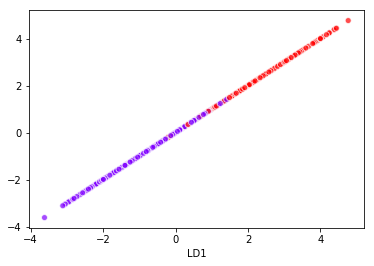

In [53]:
import matplotlib.pyplot as plt 
plt.xlabel('LD1')
#plt.ylabel('LD2')
plt.scatter(
    X_new[:,0],
    X_new[:,0],
    c=y_train,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='w'
)

In [54]:
lda.explained_variance_ratio_

array([1.])

In [55]:
lda_out = lda.predict(X_val)
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
accuracy = accuracy_score(lda_out, y_val)
confusion_matrix = confusion_matrix(lda_out, y_val)
print(classification_report(lda_out,y_val))
print(accuracy)
print(confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        86
         1.0       0.94      0.94      0.94        35

   micro avg       0.97      0.97      0.97       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.97      0.97      0.97       121

0.9669421487603306
[[84  2]
 [ 2 33]]


**Models**

**Random Forest**

In [56]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 350)
clf.fit(X_train,y_train)
sel = SelectFromModel(clf)
sel.fit(X_train, y_train)
selected_feat= X_train.columns[(sel.get_support())]
clf.fit(X_train[selected_feat], y_train)
predict = clf.predict(X_val[selected_feat])

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(predict, y_val)
confusion_matrix = confusion_matrix(predict, y_val)
print(classification_report(predict,y_val))
print(accuracy)
print(confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97        88
         1.0       0.89      0.94      0.91        33

   micro avg       0.95      0.95      0.95       121
   macro avg       0.93      0.95      0.94       121
weighted avg       0.95      0.95      0.95       121

0.9504132231404959
[[84  4]
 [ 2 31]]


In [58]:
selected_feat

Index(['Age', 'Checking_amount', 'Credit_score', 'Saving_amount'], dtype='object')

**AllFeatures**

In [59]:
clf = RandomForestClassifier(n_estimators = 350)
clf.fit(X_train,y_train)
predict = clf.predict(X_val)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(predict, y_val)
confusion_matrix = confusion_matrix(predict, y_val)
print(classification_report(predict,y_val))
print(confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        86
         1.0       0.94      0.94      0.94        35

   micro avg       0.97      0.97      0.97       121
   macro avg       0.96      0.96      0.96       121
weighted avg       0.97      0.97      0.97       121

[[84  2]
 [ 2 33]]



**Xgboost**

In [61]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=0.4,
       learning_rate=0.3, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb1.fit(X_train, y_train)
predict = xgb1.predict(X_val)

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy = accuracy_score(predict, y_val)
confusion_matrix = confusion_matrix(predict, y_val)
print(accuracy)
print(classification_report(predict,y_val))
print(confusion_matrix)

0.9504132231404959
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        86
         1.0       0.91      0.91      0.91        35

   micro avg       0.95      0.95      0.95       121
   macro avg       0.94      0.94      0.94       121
weighted avg       0.95      0.95      0.95       121

[[83  3]
 [ 3 32]]


**SVM**

In [63]:
from sklearn import svm

In [64]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train[selected_feat],y_train)
predict = clf.predict(X_val[selected_feat])

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy = accuracy_score(predict, y_val)
confusion_matrix = confusion_matrix(predict, y_val)
print(classification_report(predict, y_val))
print(confusion_matrix)

              precision    recall  f1-score   support

         0.0       0.97      0.94      0.95        88
         1.0       0.86      0.91      0.88        33

   micro avg       0.93      0.93      0.93       121
   macro avg       0.91      0.93      0.92       121
weighted avg       0.94      0.93      0.93       121

[[83  5]
 [ 3 30]]


**TrainingOnFullData**

In [31]:
''''
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 350)
clf.fit(X,y)
sel = SelectFromModel(clf)
sel.fit(X, y)
selected_feat= X.columns[(sel.get_support())]
clf.fit(X[selected_feat], y)
predict = clf.predict(Xtest[selected_feat])
''''''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-31-6a0aefe0ddc0>, line 11)

In [66]:
lda = LinearDiscriminantAnalysis(n_components = 5)
X_new = lda.fit_transform(X,y)

In [67]:
predict = lda.predict(Xtest)

**Submit_csv**

In [68]:
sub = pd.DataFrame(df_test['ID'])
sub['Default'] = predict
sub['Default'] = ['Yes' if x == 1 else 'No' for x in sub['Default']]
sub.to_csv('submit.csv', index=False)